In [1]:
import torch
import numpy as np
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

from torchvision.transforms import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from util.fileutils import reader
from util.plotutils import predict, plot_decision_boundary
from nn.mlp import MLP

In [2]:
is_train = True
dl_params = {'batch_size': 10, 'shuffle': is_train}

lr = 1e-1
input_layer = 2
hidden_layer = 50
output_layer = 2
size = 0.8
epochs = 100

In [3]:
samples, targets = reader(path='data/dados-ex5.txt')

In [4]:
train_samples, test_samples, train_labels, test_labels = train_test_split(samples, targets, test_size=0.2)
trainD = TensorDataset(train_samples, train_labels)
testD = TensorDataset(test_samples, test_labels)

train_loader = DataLoader(trainD, **dl_params)
is_train = False
test_loader = DataLoader(testD, **dl_params)

In [5]:
model = MLP(input_layer, hidden_layer, output_layer, epochs, lr, train_loader, test_loader)
model.fit(last_epoch=True)

Epoch:  100 | Loss:  0.019 | Acc:  98.33% 


[]

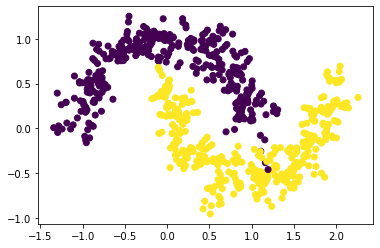

In [6]:
plt.scatter(train_samples[:, 0], train_samples[:, 1], c=train_labels)
plt.plot()

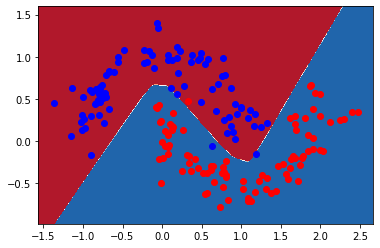

In [7]:
plot_decision_boundary(lambda x : predict(x, clf=model) , test_samples.numpy(), test_labels.numpy())

# Autores
- **Christiano Machado** @ https://github.com/chrismachado
- **Vitor Veras** @ https://github.com/vitorverasm